# Search stocks

In [9]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [10]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [11]:
etfs = ["SPY", 
"GDX", 
"URTH", 
"ARKF", 
"ARKG", 
"ARKK", 
"ARKQ", 
"ARKW", 
"DBC", 
"GLD", 
"ICLN", 
"IVV", 
"QQQ", 
"TAN", 
"USO", 
"VOO", 
"VXX", 
"XLE", 
"XLK"]

ma_count = 21


data = pdr.get_data_yahoo(etfs, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


[*********************100%***********************]  19 of 19 completed


,ARKF,ARKG,ARKK,ARKQ,ARKW,DBC,GDX,GLD,ICLN,IVV,QQQ,SPY,TAN,URTH,USO,VOO,VXX,XLE,XLK
Date,,,,,,,,,,,,,,,,,,,
2021-07-02,53.320000,92.029999,128.149994,84.720001,150.690002,19.500000,34.419998,167.289993,23.490000,435.640015,358.640015,433.720001,88.180000,127.839996,50.930000,398.750000,28.910000,54.689999,149.860001
2021-07-06,53.220001,90.680000,127.239998,83.790001,150.729996,18.969999,34.520000,168.119995,23.650000,434.529999,360.190002,432.929993,89.190002,127.480003,49.900002,398.000000,29.570000,52.910000,150.429993
2021-07-07,52.669998,88.699997,124.260002,82.779999,148.380005,18.740000,34.560001,168.759995,23.570000,436.309998,360.950012,434.459991,89.180000,127.949997,48.660000,399.369995,29.629999,52.049999,151.250000
2021-07-08,51.669998,88.680000,123.309998,81.989998,146.589996,18.900000,33.680000,168.649994,23.160000,432.809998,358.769989,430.920013,86.980003,126.519997,49.520000,396.190002,31.549999,51.750000,149.820007
2021-07-09,52.910000,89.989998,125.620003,83.419998,148.899994,19.120001,34.369999,169.210007,23.219999,437.410004,361.010010,435.519989,88.209999,128.220001,50.410000,400.369995,29.430000,52.849998,151.199997


In [12]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 5].size)
lead_comps_df = df[df['count'] >= 5]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

9


,name,count,ma_diff,ma_size,ma_type
11,TAN,32,3.789262,21,daily
15,XLK,33,3.693203,21,daily
9,QQQ,33,3.094941,21,daily
8,IVV,14,2.219525,21,daily
2,ARKK,31,2.213184,21,daily
10,SPY,14,2.118877,21,daily
14,VOO,14,1.999774,21,daily
12,URTH,11,1.410075,21,daily
7,ICLN,14,0.747931,21,daily


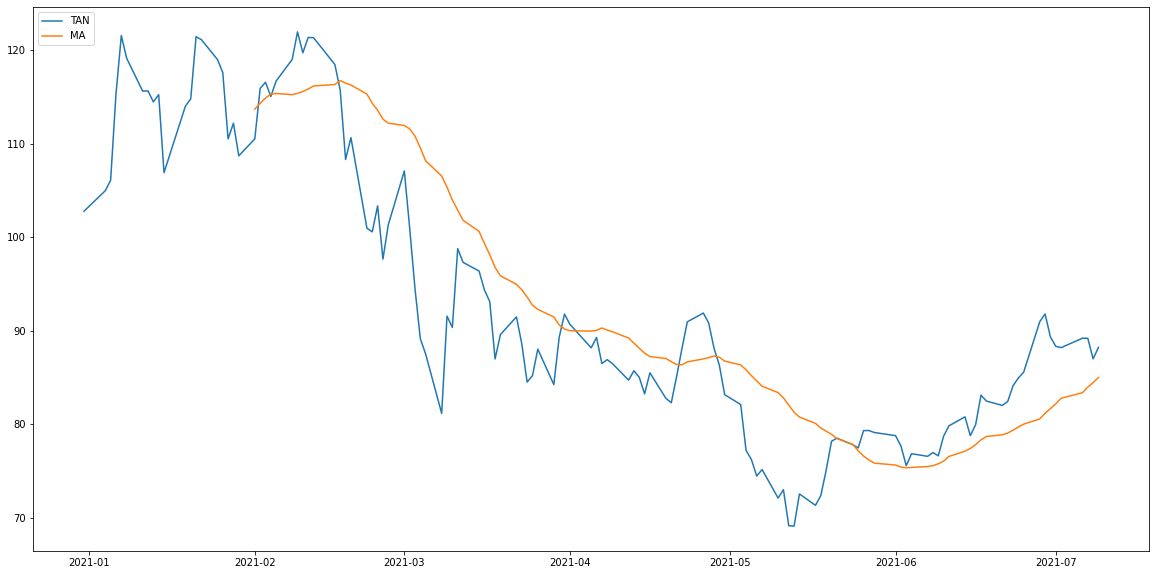

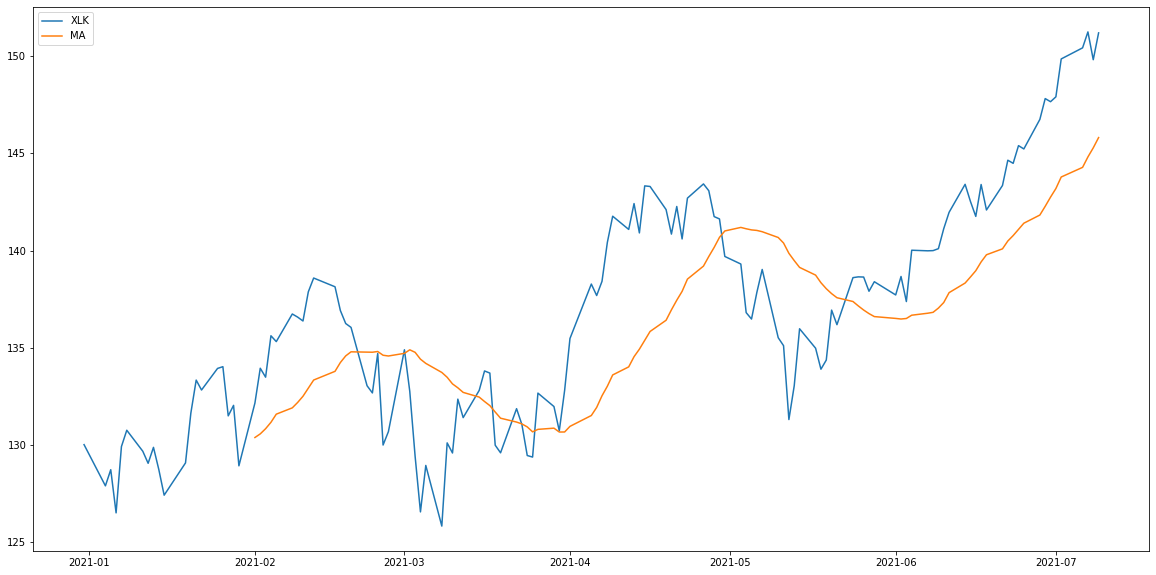

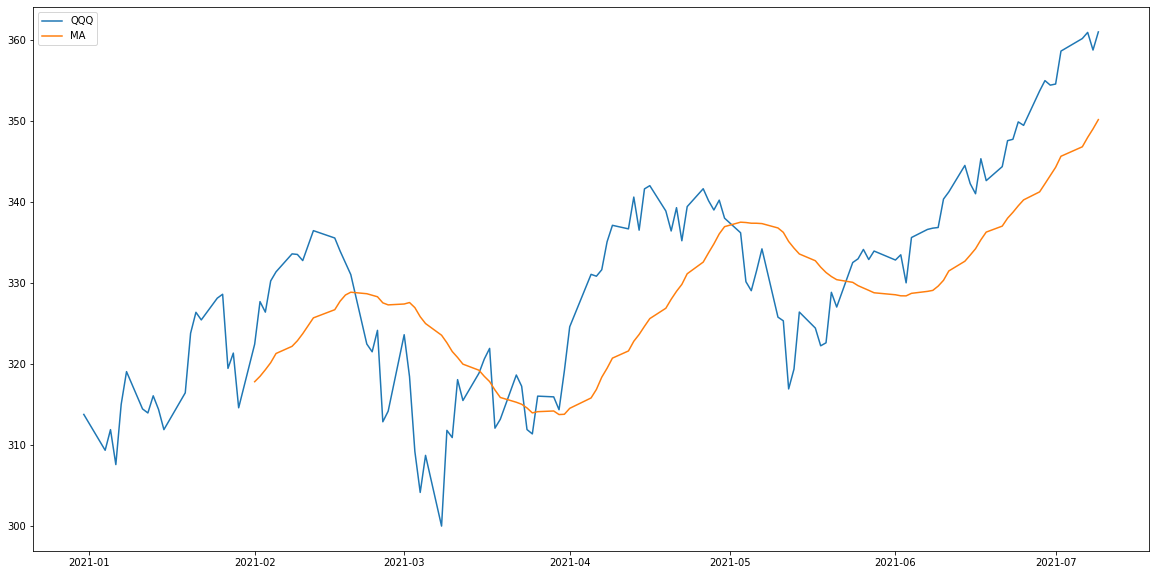

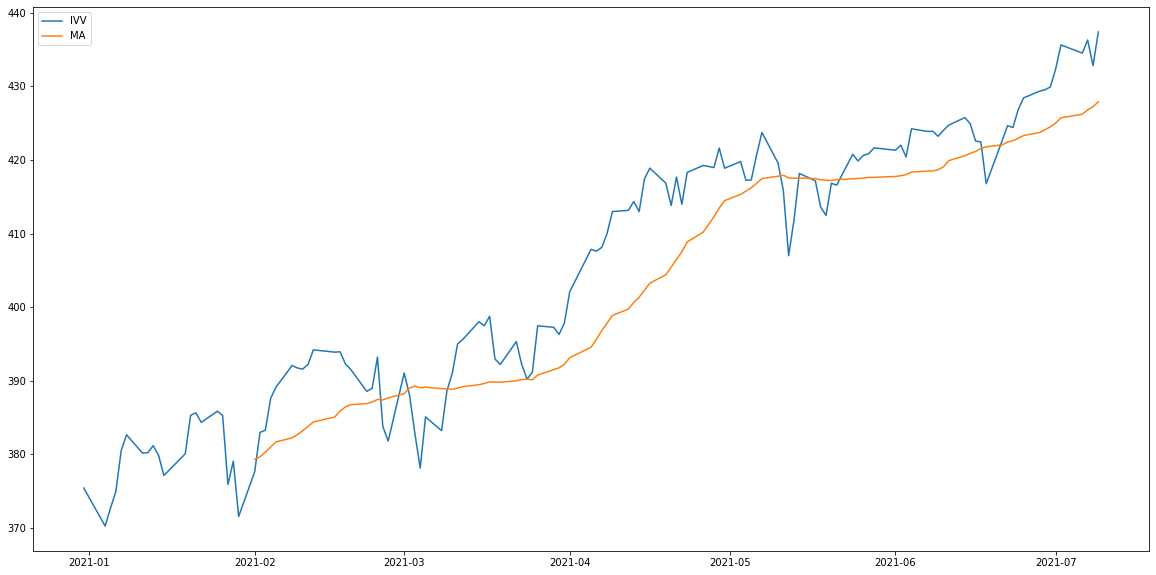

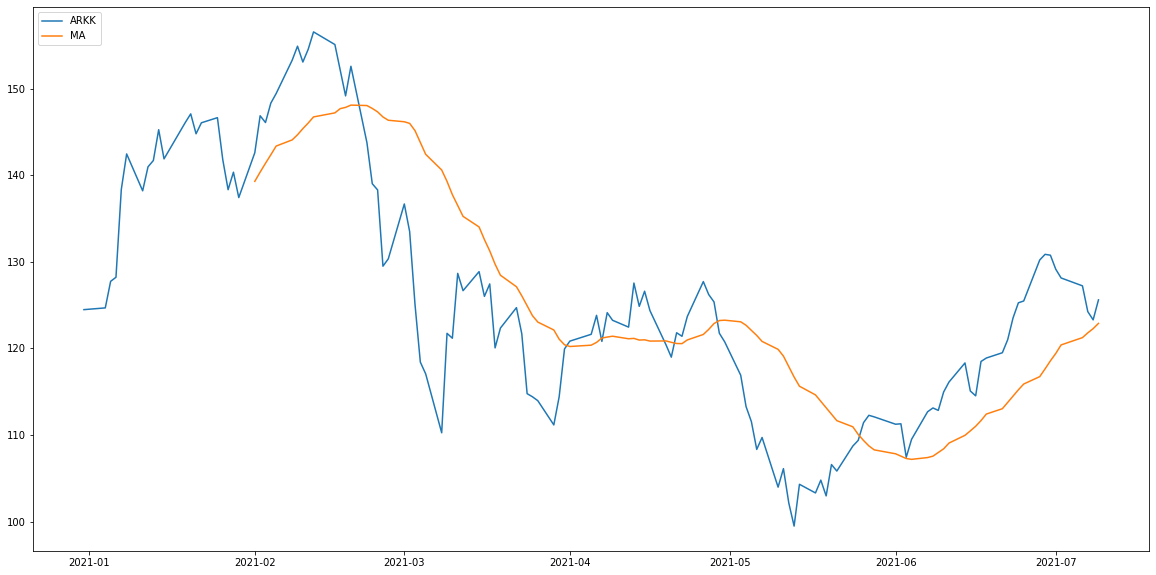

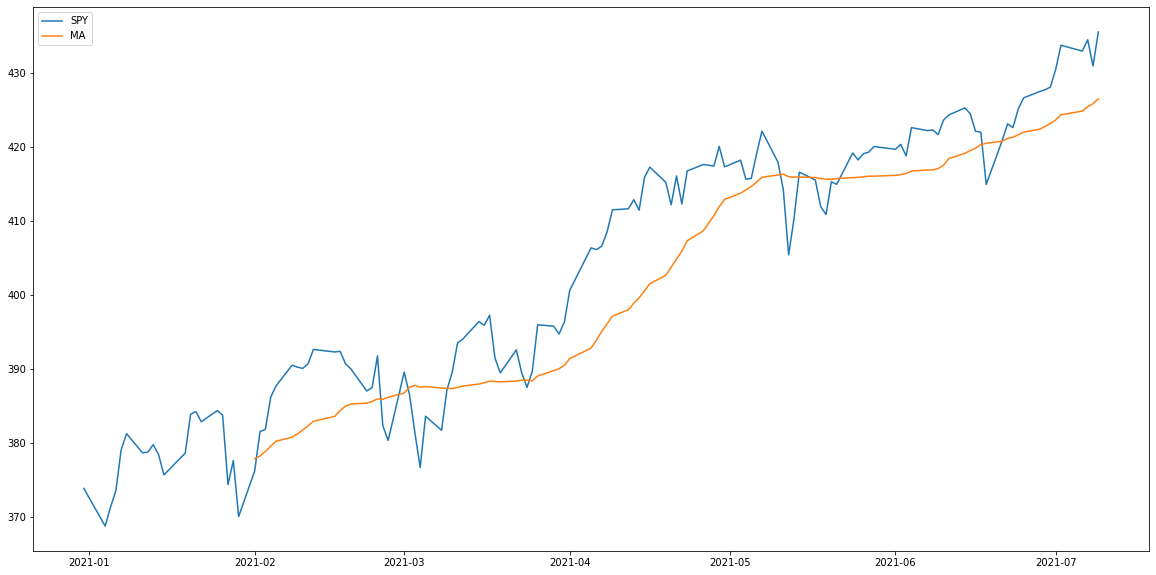

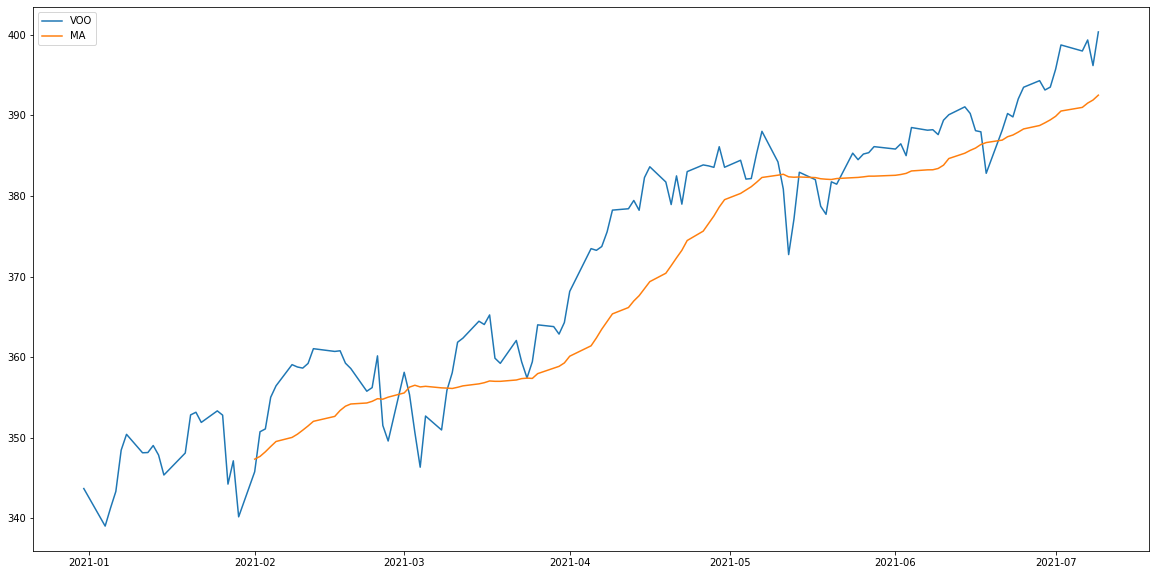

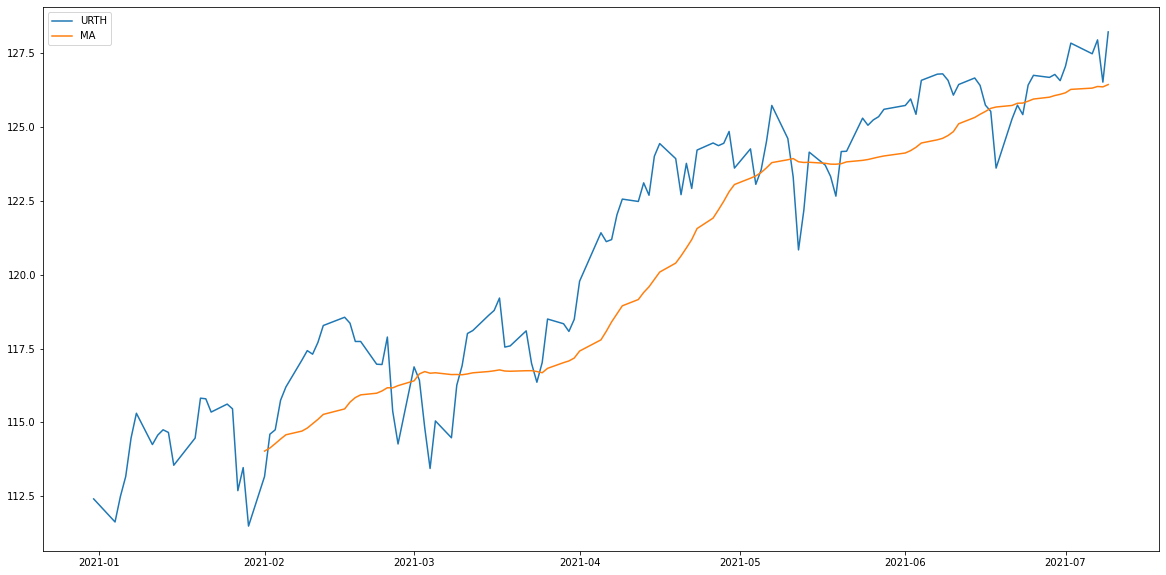

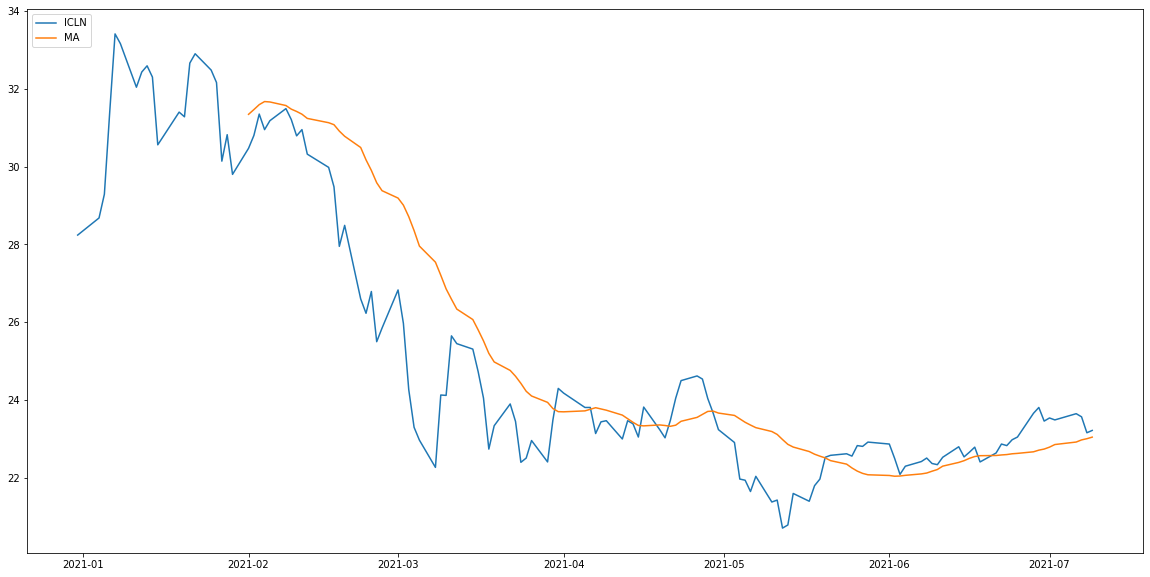

In [13]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);